#### About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.


**The Problem Statement**

The company wants to understand and process the data coming out of data engineering pipelines:
- Clean, sanitize and manipulate data to get useful features out of raw fields
- Make sense out of the raw data and help the data science team to build forecasting models on it.

**IMPORTING NECESSARY PACKAGE**

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

#### READING FILE

In [2]:
file = pd.read_csv('delhivery_data.txt')
pd.set_option('display.max_columns',None)

In [3]:
file.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


#### CHECKING UNIQUE COLUMNS

In [4]:
file.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

#### CHECKING UNIQUE ROW IN EACH COLUMN

In [5]:
file.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

In [6]:
file['data'].unique()

array(['training', 'test'], dtype=object)

In [7]:
file['route_type'].unique()

array(['Carting', 'FTL'], dtype=object)

#### CHECKING DATATYPE

In [8]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

#### CHECKING NAN VALUES

In [9]:
file.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [10]:
file[pd.isnull(file['source_name'])]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,22,2018-09-26 14:09:19,22.783440,48.0,34.0,37.7749,1.411765,48.0,34.0,37.7749,1.411765
113,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,44,2018-09-26 13:19:23,46.071250,98.0,41.0,56.3575,2.390244,49.0,33.0,34.1661,1.484848
114,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,66,2018-09-26 12:49:33,67.714993,127.0,58.0,80.4811,2.189655,29.0,17.0,24.1236,1.705882
115,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,88,2018-09-26 12:21:18,88.149642,156.0,73.0,101.2556,2.136986,28.0,14.0,20.7746,2.000000
116,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,110,2018-09-26 11:25:24,112.691981,212.0,92.0,127.9860,2.304348,55.0,18.0,26.7304,3.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144484,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,2018-10-03 22:10:43.366324,276.0,True,44,2018-10-03 20:54:08,45.134384,62.0,45.0,47.7734,1.377778,34.0,23.0,23.6601,1.478261
144485,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,2018-10-03 22:10:43.366324,276.0,True,66,2018-10-03 20:30:09,66.542266,86.0,71.0,71.9549,1.211268,23.0,25.0,24.1815,0.920000
144486,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,2018-10-03 22:10:43.366324,276.0,True,88,2018-10-03 20:00:08,88.143957,116.0,114.0,112.6943,1.017544,30.0,43.0,40.7394,0.697674
144487,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,2018-10-03 22:10:43.366324,276.0,True,110,2018-10-03 19:02:11,111.084417,173.0,123.0,134.1940,1.406504,57.0,45.0,46.9217,1.266667


####  REPLACING NAN VALUES WITH 'OTHERS' 
- DECIDES NOT TO DELETE ROWS

In [11]:
file['source_name'] = file['source_name'].fillna('(others)')

In [12]:
file['destination_name'] = file['destination_name'].fillna('(others)')

In [13]:
file.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [14]:
file.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


#### GROUPING THE DATA INTO SUB-JOURNEY
- USING GROUPBY WITH MULTIPLE COLUMNS AND DOING AGGREGATION FOR PROPER ANALYSIS.

In [15]:
file['segment_actual_time_sum'] = file.groupby(['trip_uuid','source_center','destination_center'])['segment_actual_time'].cumsum()
file['segment_osrm_time_sum'] = file.groupby(['trip_uuid','source_center','destination_center'])['segment_osrm_time'].cumsum()
file['segment_osrm_distance_sum'] = file.groupby(['trip_uuid','source_center','destination_center'])['segment_osrm_distance'].cumsum()

In [16]:
file[['actual_time','segment_actual_time','segment_actual_time_sum',   'osrm_time','segment_osrm_time','segment_osrm_time_sum',  'osrm_distance','segment_osrm_distance','segment_osrm_distance_sum']]

,actual_time,segment_actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time,segment_osrm_time_sum,osrm_distance,segment_osrm_distance,segment_osrm_distance_sum
0,14.0,14.0,14.0,11.0,11.0,11.0,11.9653,11.9653,11.9653
1,24.0,10.0,24.0,20.0,9.0,20.0,21.7243,9.7590,21.7243
2,40.0,16.0,40.0,28.0,7.0,27.0,32.5395,10.8152,32.5395
3,62.0,21.0,61.0,40.0,12.0,39.0,45.5620,13.0224,45.5619
4,68.0,6.0,67.0,44.0,5.0,44.0,54.2181,3.9153,49.4772
...,...,...,...,...,...,...,...,...,...
144862,94.0,12.0,92.0,60.0,12.0,94.0,67.9280,8.1858,65.3487
144863,120.0,26.0,118.0,76.0,21.0,115.0,85.6829,17.3725,82.7212
144864,140.0,20.0,138.0,88.0,34.0,149.0,97.0933,20.7053,103.4265
144865,158.0,17.0,155.0,98.0,27.0,176.0,111.2709,18.8885,122.3150


#### MAPPING DICTIONARY FOR AGGREGATION OF COLUMN
AGGREGATION AT SUB-JOURNEY LEVEL

In [17]:
agg_dict1 = {
    
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
    
    'actual_distance_to_destination' : 'last',
    
    'actual_time' : 'last',
    'segment_actual_time_sum' : 'last',
    
    'osrm_time' : 'last',
    'segment_osrm_time_sum' : 'last',
    
    'osrm_distance' : 'last',
    'segment_osrm_distance_sum' : 'last'
    
    
}

#### Let’s first create a unique identifier for each subjourney. This identifier will consist of trip_uuid, source_center and destination_center

In [18]:
group1 = file['trip_uuid']+file['source_center']+file['destination_center']

In [19]:
intermediate_res = file.groupby([group1]).agg(agg_dict1).reset_index().rename(columns={'index':'group'})
intermediate_res

,group,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,osrm_distance,segment_osrm_distance_sum
0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,728.0,329.0,534.0,446.5496,670.6205
1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,820.0,388.0,474.0,544.8027,649.8528
2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,46.0,26.0,26.0,28.1994,28.1995
3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,95.0,42.0,39.0,56.9116,55.9899
4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,608.0,212.0,231.0,281.2109,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,49.0,41.0,42.0,42.5213,42.1431
26364,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,89.0,48.0,77.0,40.6080,78.5869
26365,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,29.0,14.0,14.0,16.0185,16.0184
26366,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,233.0,42.0,42.0,52.5303,52.5303


In [20]:
intermediate_res = intermediate_res.sort_values(['group','od_start_time'],ascending=True)

In [21]:
intermediate_res

,group,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,osrm_distance,segment_osrm_distance_sum
0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,728.0,329.0,534.0,446.5496,670.6205
1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,820.0,388.0,474.0,544.8027,649.8528
2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,46.0,26.0,26.0,28.1994,28.1995
3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,95.0,42.0,39.0,56.9116,55.9899
4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,608.0,212.0,231.0,281.2109,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,49.0,41.0,42.0,42.5213,42.1431
26364,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,89.0,48.0,77.0,40.6080,78.5869
26365,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,29.0,14.0,14.0,16.0185,16.0184
26366,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,233.0,42.0,42.0,52.5303,52.5303


#### CONVERTING OBJECT TO DATETIME 
FOR PROPER ANALYSIS

In [22]:
intermediate_res['od_start_time'] = pd.to_datetime(intermediate_res['od_start_time'])

In [23]:
intermediate_res['od_end_time'] = pd.to_datetime(intermediate_res['od_end_time'])

EXTRACTING TIME BETWEEN OD_END_TIME AND OD_START_TIME IN (MINUTES)

In [24]:
intermediate_res['od_diff_time'] = intermediate_res['od_end_time'] - intermediate_res['od_start_time']
intermediate_res['od_diff_time_minutes'] = intermediate_res['od_diff_time'].dt.total_seconds()/60

#### MAPPING DICTIONARY FOR AGGREGATION OF COLUMN
AGGREGATION AT FULL JOURNEY LEVEL

In [25]:
agg_dict2 = {
    
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'start_scan_to_end_scan' : 'sum',
    'od_diff_time_minutes' : 'sum',
    
    'actual_distance_to_destination' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'osrm_distance' : 'sum',
    
    'actual_time' : 'sum',
    'segment_actual_time_sum' : 'sum',
    
    'osrm_time' : 'sum',
    'segment_osrm_time_sum' : 'sum'
    
}

In [26]:
final_res = intermediate_res.groupby('trip_uuid').agg(agg_dict2).reset_index(drop=True)
final_res

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_diff_time_minutes,actual_distance_to_destination,segment_osrm_distance_sum,osrm_distance,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1320.4733,991.3523,1562.0,1548.0,717.0,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,84.1894,85.1110,143.0,141.0,68.0,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,2545.2678,2354.0665,3347.0,3308.0,1740.0,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,19.8766,19.6800,59.0,59.0,15.0,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,146.7919,146.7918,341.0,340.0,117.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,64.8551,73.4630,83.0,82.0,62.0,62.0
14813,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,16.0883,16.0882,21.0,21.0,12.0,11.0
14814,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,104.8866,58.9037,282.0,281.0,48.0,88.0
14815,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723836,223.5324,171.1103,264.0,258.0,179.0,221.0


### FEATURE CREATION
CREATING NEW COLUMN WITH THE HELP OF DATETIME COLUMN FOR MORE INSIGHTS. 

In [27]:
final_res['trip_creation_time'] = pd.to_datetime(final_res['trip_creation_time'])
final_res['trip_creation_year'] = final_res['trip_creation_time'].dt.year
final_res['trip_creation_month'] = final_res['trip_creation_time'].dt.month
final_res['trip_creation_week'] = final_res['trip_creation_time'].dt.dayofweek
final_res['trip_creation_day'] = final_res['trip_creation_time'].dt.day

In [28]:
final_res

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_diff_time_minutes,actual_distance_to_destination,segment_osrm_distance_sum,osrm_distance,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,trip_creation_year,trip_creation_month,trip_creation_week,trip_creation_day
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1320.4733,991.3523,1562.0,1548.0,717.0,1008.0,2018,9,2,12
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,84.1894,85.1110,143.0,141.0,68.0,65.0,2018,9,2,12
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,2545.2678,2354.0665,3347.0,3308.0,1740.0,1941.0,2018,9,2,12
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,19.8766,19.6800,59.0,59.0,15.0,16.0,2018,9,2,12
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,146.7919,146.7918,341.0,340.0,117.0,115.0,2018,9,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,64.8551,73.4630,83.0,82.0,62.0,62.0,2018,10,2,3
14813,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,16.0883,16.0882,21.0,21.0,12.0,11.0,2018,10,2,3
14814,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,104.8866,58.9037,282.0,281.0,48.0,88.0,2018,10,2,3
14815,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723836,223.5324,171.1103,264.0,258.0,179.0,221.0,2018,10,2,3


#### MAPPING DAY NAME TO A COLUMN

In [29]:
dayname = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday',5:'Saturday', 6:'Sunday'}
final_res['trip_creation_week_name'] = final_res['trip_creation_week'].map(dayname)

#### EXTRACTING SOURCE STATE AND DESTINATION STATE
STATES (FROM WHERE) TO (TO WHERE)

In [30]:
final_res['source_state'] = final_res['source_name'].str.split('(').str[1].str.split(')').str[0]
final_res['destination_state'] = final_res['destination_name'].str.split('(').str[1].str.split(')').str[0]

In [31]:
final_res.head(4)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_diff_time_minutes,actual_distance_to_destination,segment_osrm_distance_sum,osrm_distance,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,trip_creation_year,trip_creation_month,trip_creation_week,trip_creation_day,trip_creation_week_name,source_state,destination_state
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1320.4733,991.3523,1562.0,1548.0,717.0,1008.0,2018,9,2,12,Wednesday,Uttar Pradesh,Uttar Pradesh
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,84.1894,85.1110,143.0,141.0,68.0,65.0,2018,9,2,12,Wednesday,Karnataka,Karnataka
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,2545.2678,2354.0665,3347.0,3308.0,1740.0,1941.0,2018,9,2,12,Wednesday,Haryana,Haryana
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,19.8766,19.6800,59.0,59.0,15.0,16.0,2018,9,2,12,Wednesday,Maharashtra,Maharashtra


#### EXTRACTING SOURCE CITY AND DESTINATION CITY
CITY (FROM WHERE) TO (TO WHERE)

In [32]:
final_res['source_city'] =  final_res['source_name'].str.split('_').str[0].str.split('(').str[0].str.split(' ').str[0]

In [33]:
final_res['destination_city'] = final_res['destination_name'].str.split('_').str[0]

In [34]:
def destination_to_state(destination_name):
    state = destination_name.split('(')[1]
    return state[:-1] # to remove the last character ')'

def destination_to_city(destination_name):
    city = destination_name.split('_')[0]
    return city

def destination_to_place(destination_name):
    x = destination_name.split('(')[0]
    lst = x.split('_')
    if len(lst)>=3:
        return lst[1]
    elif len(lst)==2:
        return lst[0]
    else:
        return x.split(' ')[0]
    
def destination_to_code(destination_name):
    x = destination_name.split('(')[0]
    lst = x.split('_')
    code = lst[-1]
    return code

In [35]:
final_res['source_code'] = final_res['source_name'].apply(destination_to_code)

In [36]:
final_res['destination_code'] = final_res['destination_name'].apply(destination_to_code)

In [37]:
final_res.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_diff_time_minutes,actual_distance_to_destination,segment_osrm_distance_sum,osrm_distance,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,trip_creation_year,trip_creation_month,trip_creation_week,trip_creation_day,trip_creation_week_name,source_state,destination_state,source_city,destination_city,source_code,destination_code
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1320.4733,991.3523,1562.0,1548.0,717.0,1008.0,2018,9,2,12,Wednesday,Uttar Pradesh,Uttar Pradesh,Kanpur,Kanpur,6,6
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,84.1894,85.1110,143.0,141.0,68.0,65.0,2018,9,2,12,Wednesday,Karnataka,Karnataka,Doddablpur,Doddablpur,D,D
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,2545.2678,2354.0665,3347.0,3308.0,1740.0,1941.0,2018,9,2,12,Wednesday,Haryana,Haryana,Gurgaon,Gurgaon,HB,HB
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,19.8766,19.6800,59.0,59.0,15.0,16.0,2018,9,2,12,Wednesday,Maharashtra,Maharashtra,Mumbai,Mumbai,Mumbai Hub,IP
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,146.7919,146.7918,341.0,340.0,117.0,115.0,2018,9,2,12,Wednesday,Karnataka,Karnataka,Bellary,Sandur,Dc,D


### HANDLING OUTLIERS

In [38]:
# SELECTING ONLY NUMERICAL COLUMN

num_cols = ['start_scan_to_end_scan', 'od_diff_time_minutes', 'actual_distance_to_destination',
            'segment_osrm_distance_sum','osrm_distance','actual_time','osrm_time','segment_osrm_time_sum',
            'segment_actual_time_sum']

PLOTTING GRAPHS FOR VISUALIZATION

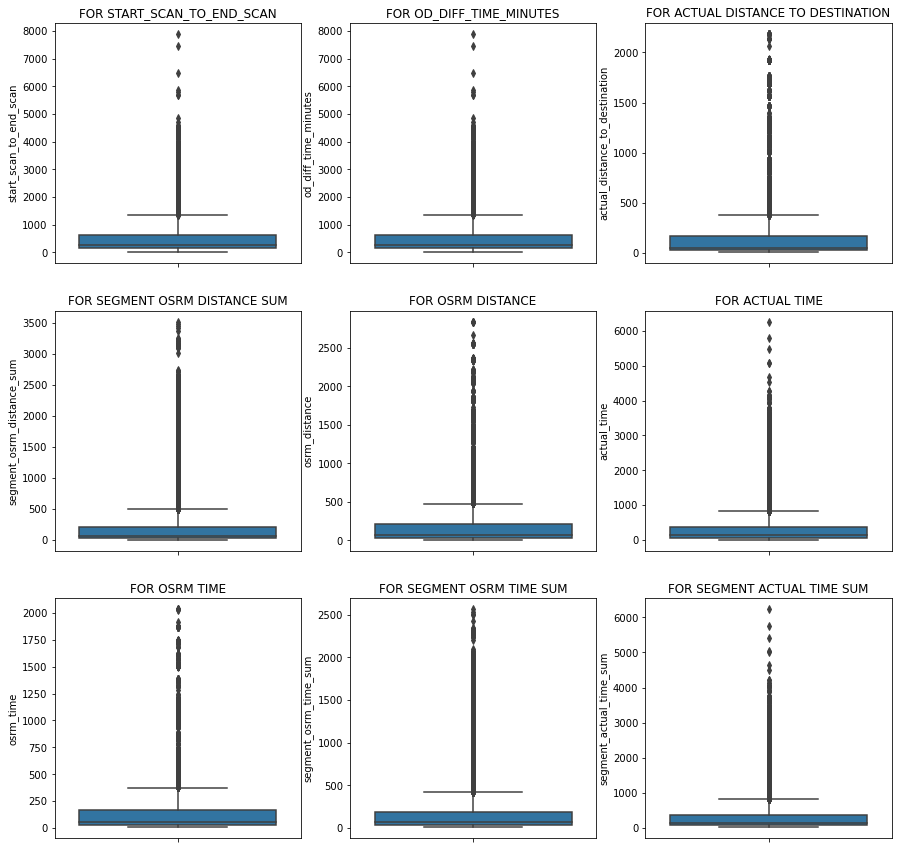

In [39]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
sns.boxplot(data=final_res, y='start_scan_to_end_scan', ax=axs[0,0]).set_title('FOR START_SCAN_TO_END_SCAN')
sns.boxplot(data=final_res, y='od_diff_time_minutes', ax=axs[0,1]).set_title('FOR OD_DIFF_TIME_MINUTES')
sns.boxplot(data=final_res, y='actual_distance_to_destination', ax=axs[0,2]).set_title('FOR ACTUAL DISTANCE TO DESTINATION')
sns.boxplot(data=final_res, y='segment_osrm_distance_sum', ax=axs[1,0]).set_title('FOR SEGMENT OSRM DISTANCE SUM')

sns.boxplot(data=final_res, y='osrm_distance', ax=axs[1,1]).set_title('FOR OSRM DISTANCE')
sns.boxplot(data=final_res, y='actual_time', ax=axs[1,2]).set_title('FOR ACTUAL TIME')
sns.boxplot(data=final_res, y='osrm_time', ax=axs[2,0]).set_title('FOR OSRM TIME')
sns.boxplot(data=final_res, y='segment_osrm_time_sum', ax=axs[2,1]).set_title('FOR SEGMENT OSRM TIME SUM')

sns.boxplot(data=final_res, y='segment_actual_time_sum', ax=axs[2,2]).set_title('FOR SEGMENT ACTUAL TIME SUM')
plt.show()

<AxesSubplot:>

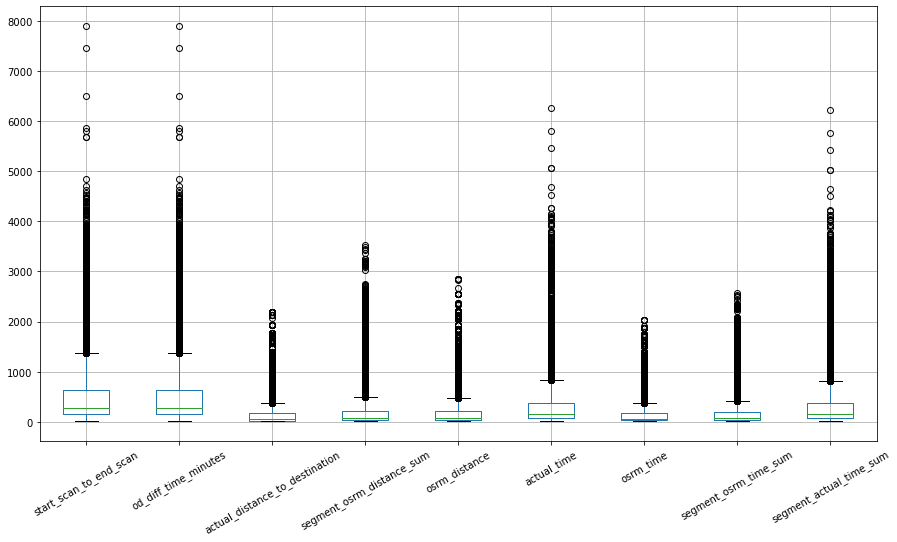

In [40]:
final_res[num_cols].boxplot(figsize=(15,8),rot=30)

#### SUMMARY
- ALMOST ALL THE COLUMNS HAVE OUTLIERS

#### DETECTING AND TREATING OUTLIERS (USING  MEDIAN)
TAKING MEDIAN FROM THE ROWS WHICH ARE BETWEEN LOWER BOUND AND UPPER BOUND RANGE AND REPLACING IT WITH
VALUES OUTSIDE LOWER AND UPPER BOUND RANGE.

In [41]:
num_cols

['start_scan_to_end_scan',
 'od_diff_time_minutes',
 'actual_distance_to_destination',
 'segment_osrm_distance_sum',
 'osrm_distance',
 'actual_time',
 'osrm_time',
 'segment_osrm_time_sum',
 'segment_actual_time_sum']

In [42]:
for column in num_cols:
    q1 = final_res[column].quantile(0.25)
    q3 = final_res[column].quantile(0.75)
    iqr = q3-q1
    
    actual_time_median = final_res[(final_res[column]>=(q1-iqr*1.5)) | ( final_res[column] <= (q3+iqr*1.5))][column].median()
    final_res.loc[(final_res[column]<(q1-iqr*1.5)) | ( final_res[column] > (q3+iqr*1.5)),column]=actual_time_median

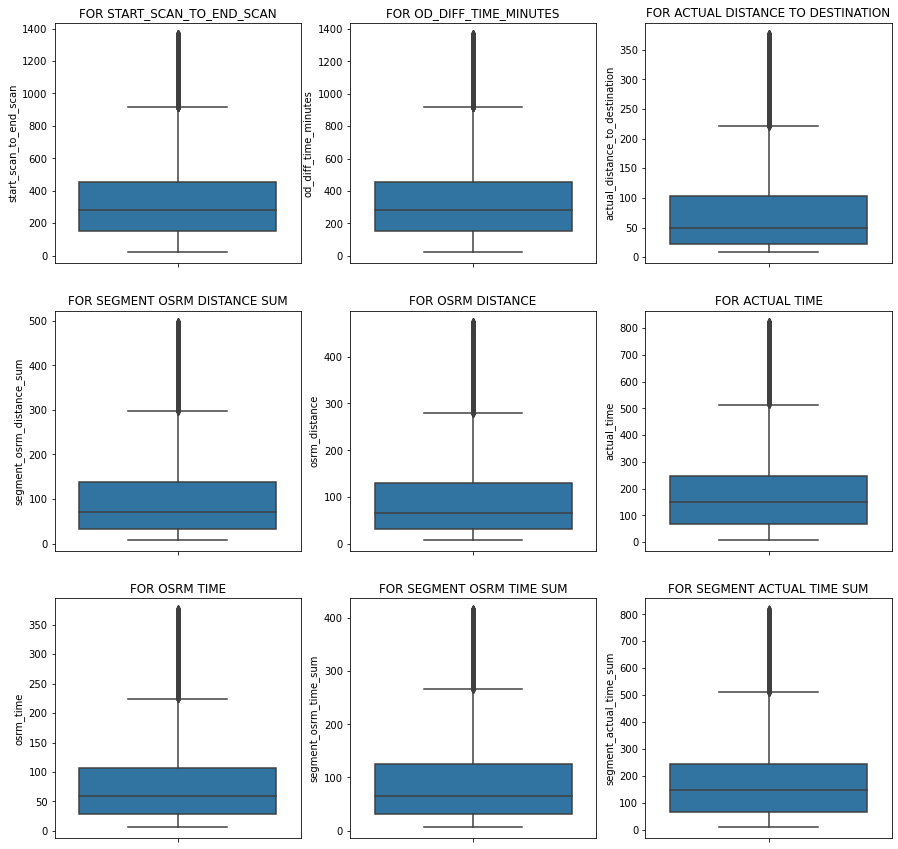

In [43]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
sns.boxplot(data=final_res, y='start_scan_to_end_scan', ax=axs[0,0]).set_title('FOR START_SCAN_TO_END_SCAN')
sns.boxplot(data=final_res, y='od_diff_time_minutes', ax=axs[0,1]).set_title('FOR OD_DIFF_TIME_MINUTES')
sns.boxplot(data=final_res, y='actual_distance_to_destination', ax=axs[0,2]).set_title('FOR ACTUAL DISTANCE TO DESTINATION')
sns.boxplot(data=final_res, y='segment_osrm_distance_sum', ax=axs[1,0]).set_title('FOR SEGMENT OSRM DISTANCE SUM')

sns.boxplot(data=final_res, y='osrm_distance', ax=axs[1,1]).set_title('FOR OSRM DISTANCE')
sns.boxplot(data=final_res, y='actual_time', ax=axs[1,2]).set_title('FOR ACTUAL TIME')
sns.boxplot(data=final_res, y='osrm_time', ax=axs[2,0]).set_title('FOR OSRM TIME')
sns.boxplot(data=final_res, y='segment_osrm_time_sum', ax=axs[2,1]).set_title('FOR SEGMENT OSRM TIME SUM')

sns.boxplot(data=final_res, y='segment_actual_time_sum', ax=axs[2,2]).set_title('FOR SEGMENT ACTUAL TIME SUM')
plt.show()

<AxesSubplot:>

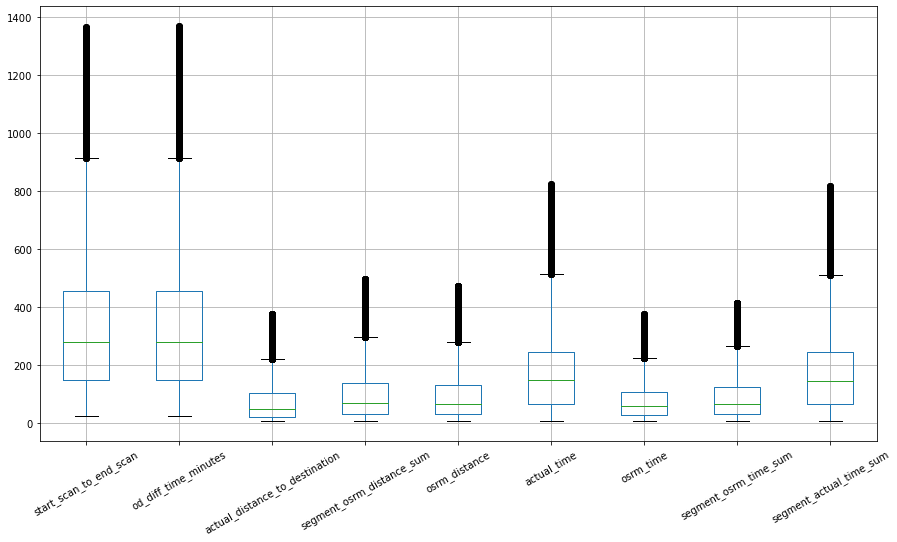

In [44]:
final_res[num_cols].boxplot(figsize=(15,8),rot=30)

### PERFORMING HYPOTHESIS
TO CLARIFY WHETHER OUR ASSUMPTIONS ARE CORRECT OR NOT

#### STEPS TO PERFORM HYPOTHESIS
- CHECK BASIC ASSUMPTIONS OF HYPOTHESIS
- SET NULL AND ALTERNATE HYPOTHESIS
- SET SIGNIFICANCE LEVEL AND ALPHA VALUE
- FIND P-VALUE AND COMPARE THE RESULT

Based on p-value, we will accept or reject H0.
- p-val > alpha : Accept H0
- p-val < alpha : Reject H0

#### Notice: that the values of actual timing and estimated timing don’t necessarily match. So, let’s test the hypothesis with the columns.

#### FOR -  ACTUAL TIME  AND  SEGMENT ACTUAL TIME SUM
TO CHECK WHETHER ACTUAL TIME  AND  SEGMENT ACTUAL TIME SUM ARE DIFFERENT OR SAME.

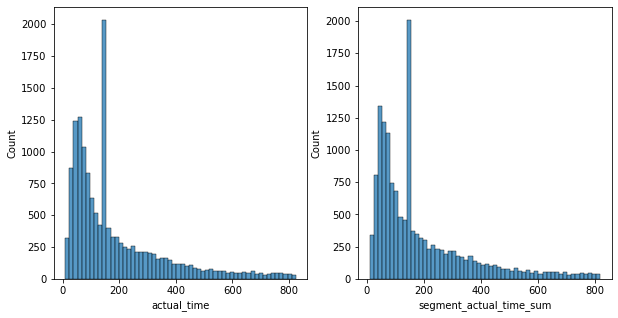

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(x='actual_time', data=final_res)
plt.subplot(1,2,2)
sns.histplot(x='segment_actual_time_sum', data=final_res)
plt.show()

#### Neither of the graphs follow normal distribution So, let’s use shapiro-wilk test to confirm the same

In [46]:
from scipy.stats import shapiro
p_val_1 = shapiro(final_res['actual_time'])[1]
p_val_2 = shapiro(final_res['segment_actual_time_sum'])[1]
print(f'p_value of actual_time is {p_val_1} and p_value of segment_actual_time_sum is {p_val_2}')


p_value of actual_time is 0.0 and p_value of segment_actual_time_sum is 0.0


C:\Users\SOURABH\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### This confirms that the graphs don’t follow normal distribution. Let’s test our hypothesis both visually and statistically (non-parametric test).

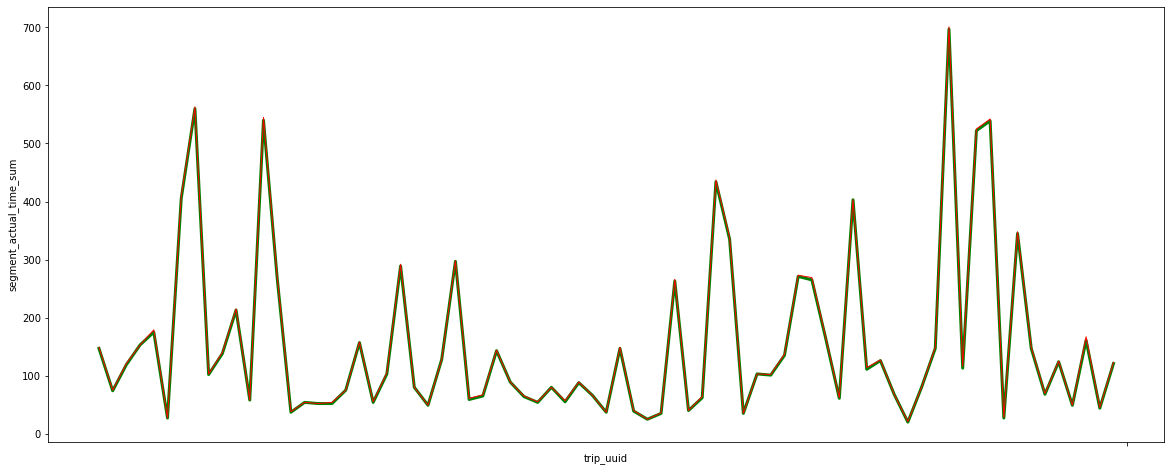

In [47]:
 plt.figure(figsize=(20,8))
sns.lineplot(x=final_res['trip_uuid'][::200],y=final_res['segment_actual_time_sum'][::200], color='g', lw=3)
sns.lineplot(x=final_res['trip_uuid'][::200], y=final_res['actual_time'][::200],color='r', lw=1)
plt.xticks('')
plt.show()


#### SINCE THE DISTRIBUTION IS NOT NORMAL, WE HAVE TO USE WILCOXON SIGNED RANK TEST

In [48]:
from scipy.stats import wilcoxon

In [49]:
p_value = wilcoxon(final_res['actual_time'],final_res['segment_actual_time_sum'])[1]
if p_value >= 0.05:
    print('Fail to reject Null Hypothesis')
    print('There is no difference in actual_time and segment_actual_time_sum')
else:
    print('Reject Null Hypothesis')
    print('There is statistically significant difference in actual_time and segment_actual_time_sum.')


Reject Null Hypothesis
There is statistically significant difference in actual_time and segment_actual_time_sum.


#### SUMMARY
- FROM THE ABOVE T-TEST AND HYPOTHESIS WE CAN SEE THAT 'ACTUAL TIME' AND ''SEGMENT ACTUAL TIME' ARE DIFFERENT
- SO WE CAN CONCLUDE THAT DELHIVERY HAD TAKEN SLIGHTLY DIFFERENT TIME.

#### FOR -  ACTUAL DISTANCE TO DESTINATION, OSRM DISTANCE
TO CHECK WHETHER ACTUAL_DISTANCE_TO_DESTINATION AND OSRM_DISTANCE ARE DIFFERENT OR SAME.

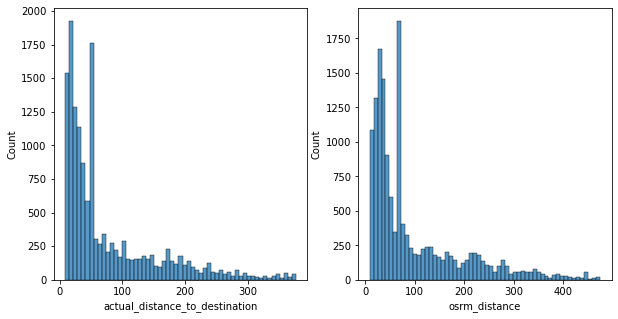

In [50]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(x='actual_distance_to_destination', data=final_res)
plt.subplot(1,2,2)
sns.histplot(x='osrm_distance', data=final_res)
plt.show()

#### Neither of the graphs follow normal distribution So, let’s use shapiro-wilk test to confirm the same

In [51]:
p_val_1 = shapiro(final_res['actual_distance_to_destination'])[1]
p_val_2 = shapiro(final_res['osrm_distance'])[1]
print(f'p_value of actual_distance_to_destination is {p_val_1} and p_value of osrm_distance is {p_val_2}')

p_value of actual_distance_to_destination is 0.0 and p_value of osrm_distance is 0.0


C:\Users\SOURABH\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### This confirms that the graphs don’t follow normal distribution. Let’s test our hypothesis both visually and statistically (non-parametric test).

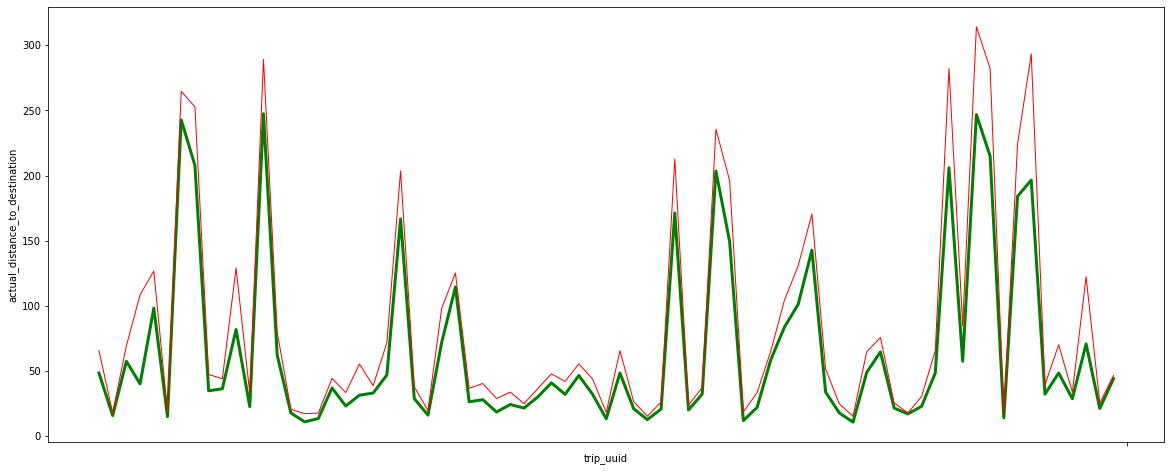

In [52]:
plt.figure(figsize=(20,8))
sns.lineplot(x=final_res['trip_uuid'][::200],y=final_res['actual_distance_to_destination'][::200], color='g', lw=3)
sns.lineplot(x=final_res['trip_uuid'][::200], y=final_res['osrm_distance'][::200],color='r', lw=1)
plt.xticks('')
plt.show()


#### This confirms that the graphs don’t follow normal distribution. Let’s test our hypothesis both visually and statistically (non-parametric test).

In [53]:
p_value = wilcoxon(final_res['actual_distance_to_destination'],final_res['osrm_distance'])[1]
if p_value >= 0.05:
    print('Fail to reject Null Hypothesis')
    print('There is no difference in actual_distance_to_destination and osrm_distance')
else:
    print('Reject Null Hypothesis')
    print('There is statistically significant difference in actual_distance_to_destination and osrm_distance.')


Reject Null Hypothesis
There is statistically significant difference in actual_distance_to_destination and osrm_distance.


#### SUMMARY
- FROM THE ABOVE T-TEST AND HYPOTHESIS WE CAN SEE THAT 'actual_distance_to_destination' AND 'OSRM DISTANCE' ARE DIFFERENT
- SO WE CAN CONCLUDE THAT DELHIVERY HAD TAKEN SLIGHTLY DIFFERENT TIME.

#### FOR - OSRM TIME  AND  SEGMENT OSRM TIME SUM
TO CHECK WHETHER OSRM_TIME AND SEGMENT_OSRM_TIME_SUM ARE DIFFERENT OR SAME.

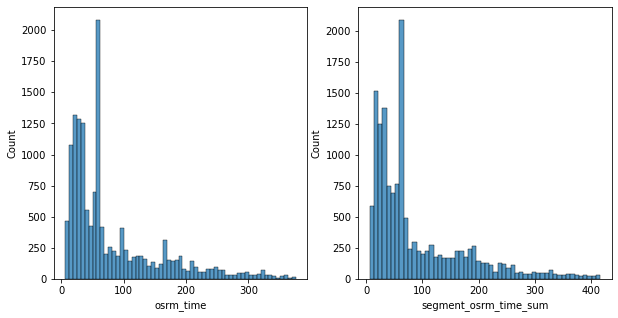

In [54]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(x='osrm_time', data=final_res)
plt.subplot(1,2,2)
sns.histplot(x='segment_osrm_time_sum', data=final_res)
plt.show()

#### Neither of the graphs follow normal distribution So, let’s use shapiro-wilk test to confirm the same

In [55]:
p_val_1 = shapiro(final_res['osrm_time'])[1]
p_val_2 = shapiro(final_res['segment_osrm_time_sum'])[1]
print(f'p_value of osrm_time is {p_val_1} and p_value of segment_osrm_time_sum is {p_val_2}')

p_value of osrm_time is 0.0 and p_value of segment_osrm_time_sum is 0.0


C:\Users\SOURABH\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### This confirms that the graphs don’t follow normal distribution. Let’s test our hypothesis both visually and statistically (non-parametric test).

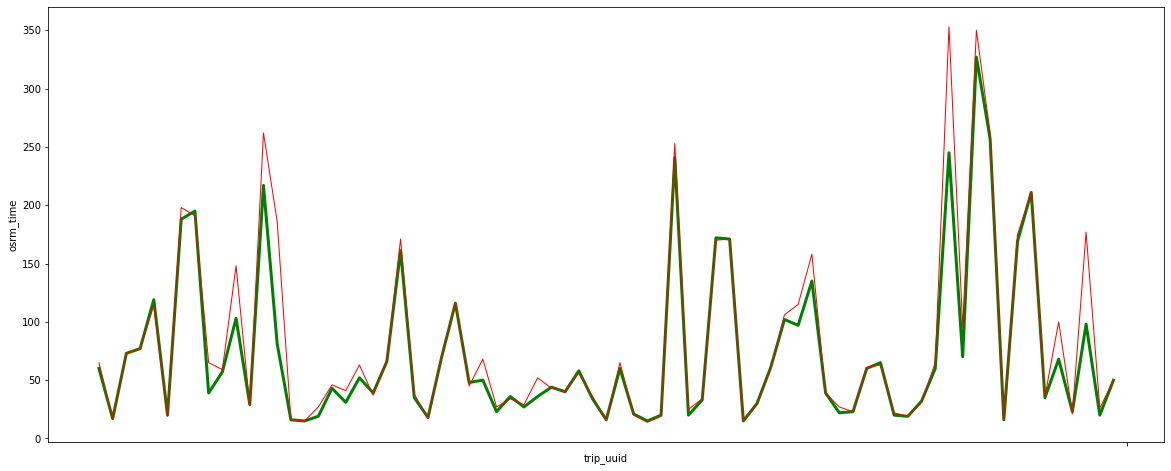

In [56]:
plt.figure(figsize=(20,8))
sns.lineplot(x=final_res['trip_uuid'][::200],y=final_res['osrm_time'][::200], color='g', lw=3)
sns.lineplot(x=final_res['trip_uuid'][::200], y=final_res['segment_osrm_time_sum'][::200],color='r', lw=1)
plt.xticks('')
plt.show()

#### This confirms that the graphs don’t follow normal distribution. Let’s test our hypothesis both visually and statistically (non-parametric test).

In [57]:
p_value = wilcoxon(final_res['osrm_time'],final_res['segment_osrm_time_sum'])[1]
if p_value >= 0.05:
    print('Fail to reject Null Hypothesis')
    print('There is no difference in osrm_time and segment_osrm_time_sum')
else:
    print('Reject Null Hypothesis')
    print('There is statistically significant difference in osrm_time and segment_osrm_time_sum.')


Reject Null Hypothesis
There is statistically significant difference in osrm_time and segment_osrm_time_sum.


#### SUMMARY
- FROM THE ABOVE T-TEST AND HYPOTHESIS WE CAN SEE THAT 'osrm_time' AND 'segment_osrm_time_sum' ARE DIFFERENT
- SO WE CAN CONCLUDE THAT DELHIVERY HAD TAKEN SLIGHTLY DIFFERENT TIME.

#### FOR - ACTUAL DISTANCE TO DESTINATION  AND  OSRM DISTANCE
TO CHECK WHETHER ACTUAL_DISTANCE_TO_DESTINATION AND OSRM_DISTANCE ARE DIFFERENT OR SAME.

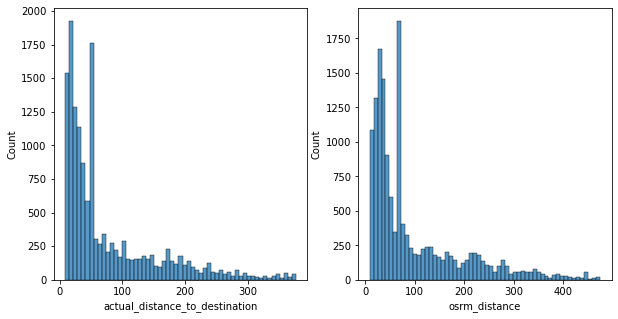

In [58]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(x='actual_distance_to_destination', data=final_res)
plt.subplot(1,2,2)
sns.histplot(x='osrm_distance', data=final_res)
plt.show()

#### Neither of the graphs follow normal distribution So, let’s use shapiro-wilk test to confirm the same

In [59]:
p_val_1 = shapiro(final_res['actual_distance_to_destination'])[1]
p_val_2 = shapiro(final_res['osrm_distance'])[1]
print(f'p_value of actual_distance_to_destination is {p_val_1} and p_value of osrm_distance is {p_val_2}')

p_value of actual_distance_to_destination is 0.0 and p_value of osrm_distance is 0.0


C:\Users\SOURABH\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### This confirms that the graphs don’t follow normal distribution. Let’s test our hypothesis both visually and statistically (non-parametric test).

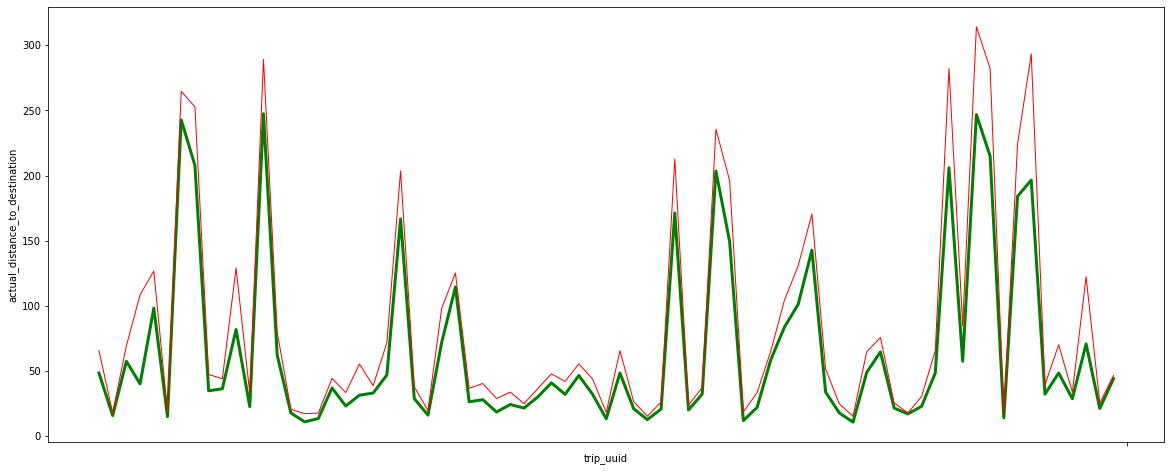

In [60]:
plt.figure(figsize=(20,8))
sns.lineplot(x=final_res['trip_uuid'][::200],y=final_res['actual_distance_to_destination'][::200], color='g', lw=3)
sns.lineplot(x=final_res['trip_uuid'][::200], y=final_res['osrm_distance'][::200],color='r', lw=1)
plt.xticks('')
plt.show()

#### This confirms that the graphs don’t follow normal distribution. Let’s test our hypothesis both visually and statistically (non-parametric test).

In [61]:
p_value = wilcoxon(final_res['actual_distance_to_destination'],final_res['osrm_distance'])[1]
if p_value >= 0.05:
    print('Fail to reject Null Hypothesis')
    print('There is no difference in actual_distance_to_destination and osrm_distance')
else:
    print('Reject Null Hypothesis')
    print('There is statistically significant difference in actual_distance_to_destination and osrm_distance.')


Reject Null Hypothesis
There is statistically significant difference in actual_distance_to_destination and osrm_distance.


#### SUMMARY
- FROM THE ABOVE T-TEST AND HYPOTHESIS WE CAN SEE THAT 'actual_distance_to_destination' AND 'osrm_distance' ARE DIFFERENT
- SO WE CAN CONCLUDE THAT DELHIVERY HAD TAKEN SLIGHTLY DIFFERENT TIME.

### HANDELING CATEGORICAL VARIABLE

#### Making a copy of originale file to avoid data hamper in original file.

In [62]:
new_final = final_res.copy()

In [63]:
s = (new_final.dtypes=='object')
object_cols = list(s[s].index)
object_cols

['data',
 'route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name',
 'trip_creation_week_name',
 'source_state',
 'destination_state',
 'source_city',
 'destination_city',
 'source_code',
 'destination_code']

In [64]:
new_final[object_cols]

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_week_name,source_state,destination_state,source_city,destination_city,source_code,destination_code
0,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Wednesday,Uttar Pradesh,Uttar Pradesh,Kanpur,Kanpur,6,6
1,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),Wednesday,Karnataka,Karnataka,Doddablpur,Doddablpur,D,D
2,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Wednesday,Haryana,Haryana,Gurgaon,Gurgaon,HB,HB
3,training,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),Wednesday,Maharashtra,Maharashtra,Mumbai,Mumbai,Mumbai Hub,IP
4,training,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),Wednesday,Karnataka,Karnataka,Bellary,Sandur,Dc,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),Wednesday,Punjab,Punjab,Chandigarh,Chandigarh,H,H
14813,test,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),Wednesday,Haryana,Haryana,FBD,Faridabad,DPC,DC
14814,test,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),Wednesday,Uttar Pradesh,Uttar Pradesh,Kanpur,Kanpur,DC,DC
14815,test,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),Wednesday,Tamil Nadu,Tamil Nadu,Tirunelveli,Tirchchndr,I,D


In [65]:
new_final[object_cols].nunique()

data                           2
route_schedule_uuid         1504
route_type                     2
trip_uuid                  14817
source_center                938
source_name                  934
destination_center          1042
destination_name            1035
trip_creation_week_name        7
source_state                  30
destination_state             32
source_city                  717
destination_city             856
source_code                  100
destination_code              97
dtype: int64

#### SINCE ROUTE_TYPE HAS 2 CATEGORICAL VARIABLES AND IT IS NON-ORDINAL WE USE ONE-HOT ENCODING

In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
ohe = OneHotEncoder()

In [68]:
ohe.fit_transform(new_final[["route_type"]])

<14817x2 sparse matrix of type '<class 'numpy.float64'>'
	with 14817 stored elements in Compressed Sparse Row format>

In [69]:
# for seeing which category is first
ohe.categories_[0]

array(['Carting', 'FTL'], dtype=object)

In [70]:
ohe.fit_transform(new_final[["route_type"]]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [71]:
root_type = pd.DataFrame(ohe.fit_transform(new_final[["route_type"]]).toarray(),columns=ohe.categories_[0])
root_type

,Carting,FTL
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
14812,1.0,0.0
14813,1.0,0.0
14814,1.0,0.0
14815,1.0,0.0


In [72]:
final_res = pd.concat([new_final,root_type],axis=1)

In [73]:
final_res.drop(columns=['route_type'],inplace=True)

In [74]:
final_res

,data,trip_creation_time,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_diff_time_minutes,actual_distance_to_destination,segment_osrm_distance_sum,osrm_distance,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,trip_creation_year,trip_creation_month,trip_creation_week,trip_creation_day,trip_creation_week_name,source_state,destination_state,source_city,destination_city,source_code,destination_code,Carting,FTL
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),280.0,280.765626,48.474072,70.1544,65.6188,149.0,147.0,60.0,65.0,2018,9,2,12,Wednesday,Uttar Pradesh,Uttar Pradesh,Kanpur,Kanpur,6,6,0.0,1.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,84.1894,85.1110,143.0,141.0,68.0,65.0,2018,9,2,12,Wednesday,Karnataka,Karnataka,Doddablpur,Doddablpur,D,D,1.0,0.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),280.0,280.765626,48.474072,70.1544,65.6188,149.0,147.0,60.0,65.0,2018,9,2,12,Wednesday,Haryana,Haryana,Gurgaon,Gurgaon,HB,HB,0.0,1.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,19.8766,19.6800,59.0,59.0,15.0,16.0,2018,9,2,12,Wednesday,Maharashtra,Maharashtra,Mumbai,Mumbai,Mumbai Hub,IP,1.0,0.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,146.7919,146.7918,341.0,340.0,117.0,115.0,2018,9,2,12,Wednesday,Karnataka,Karnataka,Bellary,Sandur,Dc,D,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,64.8551,73.4630,83.0,82.0,62.0,62.0,2018,10,2,3,Wednesday,Punjab,Punjab,Chandigarh,Chandigarh,H,H,1.0,0.0
14813,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,16.0883,16.0882,21.0,21.0,12.0,11.0,2018,10,2,3,Wednesday,Haryana,Haryana,FBD,Faridabad,DPC,DC,1.0,0.0
14814,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,104.8866,58.9037,282.0,281.0,48.0,88.0,2018,10,2,3,Wednesday,Uttar Pradesh,Uttar Pradesh,Kanpur,Kanpur,DC,DC,1.0,0.0
14815,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723836,223.5324,171.1103,264.0,258.0,179.0,221.0,2018,10,2,3,Wednesday,Tamil Nadu,Tamil Nadu,Tirunelveli,Tirchchndr,I,D,1.0,0.0


### NORMALIZE / STANDARDIZE

#### USING - StandardScaler

In [75]:
final_res.dtypes

data                                      object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
start_scan_to_end_scan                   float64
od_diff_time_minutes                     float64
actual_distance_to_destination           float64
segment_osrm_distance_sum                float64
osrm_distance                            float64
actual_time                              float64
segment_actual_time_sum                  float64
osrm_time                                float64
segment_osrm_time_sum                    float64
trip_creation_year                         int64
trip_creation_month                        int64
trip_creation_week                         int64
trip_creation_day   

In [76]:
# removing object and datetime datatypes
num_col = ((final_res.dtypes!='object') & (final_res.dtypes!='datetime64[ns]'))

In [77]:
num_cols = list(num_col[num_col].index)
num_cols

['start_scan_to_end_scan',
 'od_diff_time_minutes',
 'actual_distance_to_destination',
 'segment_osrm_distance_sum',
 'osrm_distance',
 'actual_time',
 'segment_actual_time_sum',
 'osrm_time',
 'segment_osrm_time_sum',
 'trip_creation_year',
 'trip_creation_month',
 'trip_creation_week',
 'trip_creation_day',
 'Carting',
 'FTL']

In [78]:
# IMPORTING NECCESSARY PACKAGE
# TO CONVERT NUMERIC COLUMN INTO STANDARD SCALE VALUE

from sklearn.preprocessing import StandardScaler

In [79]:
scalar = StandardScaler()
scalar.fit(final_res[num_cols])

StandardScaler()

In [80]:
final_res[num_cols]

,start_scan_to_end_scan,od_diff_time_minutes,actual_distance_to_destination,segment_osrm_distance_sum,osrm_distance,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,trip_creation_year,trip_creation_month,trip_creation_week,trip_creation_day,Carting,FTL
0,280.0,280.765626,48.474072,70.1544,65.6188,149.0,147.0,60.0,65.0,2018,9,2,12,0.0,1.0
1,180.0,181.611874,73.186911,84.1894,85.1110,143.0,141.0,68.0,65.0,2018,9,2,12,1.0,0.0
2,280.0,280.765626,48.474072,70.1544,65.6188,149.0,147.0,60.0,65.0,2018,9,2,12,0.0,1.0
3,100.0,100.494935,17.175274,19.8766,19.6800,59.0,59.0,15.0,16.0,2018,9,2,12,1.0,0.0
4,717.0,718.349042,127.448500,146.7919,146.7918,341.0,340.0,117.0,115.0,2018,9,2,12,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,257.0,258.028928,57.762332,64.8551,73.4630,83.0,82.0,62.0,62.0,2018,10,2,3,1.0,0.0
14813,60.0,60.590521,15.513784,16.0883,16.0882,21.0,21.0,12.0,11.0,2018,10,2,3,1.0,0.0
14814,421.0,422.119867,38.684839,104.8866,58.9037,282.0,281.0,48.0,88.0,2018,10,2,3,1.0,0.0
14815,347.0,348.512862,134.723836,223.5324,171.1103,264.0,258.0,179.0,221.0,2018,10,2,3,1.0,0.0


In [81]:
final_res[num_cols] = scalar.transform(final_res[num_cols])

In [82]:
final_res[num_cols]

,start_scan_to_end_scan,od_diff_time_minutes,actual_distance_to_destination,segment_osrm_distance_sum,osrm_distance,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,trip_creation_year,trip_creation_month,trip_creation_week,trip_creation_day,Carting,FTL
0,-0.267291,-0.267487,-0.364896,-0.323742,-0.325484,-0.234230,-0.236932,-0.295642,-0.304562,0.0,-0.370449,-0.476914,-0.807143,-1.227815,1.227815
1,-0.600245,-0.597164,-0.047789,-0.182123,-0.119476,-0.269412,-0.272371,-0.190391,-0.304562,0.0,-0.370449,-0.476914,-0.807143,0.814455,-0.814455
2,-0.267291,-0.267487,-0.364896,-0.323742,-0.325484,-0.234230,-0.236932,-0.295642,-0.304562,0.0,-0.370449,-0.476914,-0.807143,-1.227815,1.227815
3,-0.866607,-0.866871,-0.766511,-0.831067,-0.811000,-0.761958,-0.756706,-0.887679,-0.883445,0.0,-0.370449,-0.476914,-0.807143,0.814455,-0.814455
4,1.187714,1.187439,0.648477,0.449563,0.532413,0.891589,0.903027,0.454272,0.286136,0.0,-0.370449,-0.476914,-0.807143,-1.227815,1.227815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,-0.343871,-0.343084,-0.245712,-0.377215,-0.242581,-0.621230,-0.620856,-0.269329,-0.340004,0.0,2.699428,-0.476914,-1.947393,0.814455,-0.814455
14813,-0.999788,-0.999549,-0.787831,-0.869293,-0.848961,-0.984776,-0.981154,-0.927148,-0.942515,0.0,2.699428,-0.476914,-1.947393,0.814455,-0.814455
14814,0.202172,0.202504,-0.490508,0.026721,-0.396454,0.545634,0.554542,-0.453518,-0.032841,0.0,2.699428,-0.476914,-1.947393,0.814455,-0.814455
14815,-0.044213,-0.042233,0.741832,1.223908,0.789430,0.440089,0.418692,1.269968,1.538414,0.0,2.699428,-0.476914,-1.947393,0.814455,-0.814455


### EXPLORATORY DATA ANALYSIS (EDA)

#### Using preserved copied Dataframe

### UNIVARIATE ANALYSIS

In [83]:
new_final.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_diff_time_minutes,actual_distance_to_destination,segment_osrm_distance_sum,osrm_distance,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,trip_creation_year,trip_creation_month,trip_creation_week,trip_creation_day,trip_creation_week_name,source_state,destination_state,source_city,destination_city,source_code,destination_code
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),280.0,280.765626,48.474072,70.1544,65.6188,149.0,147.0,60.0,65.0,2018,9,2,12,Wednesday,Uttar Pradesh,Uttar Pradesh,Kanpur,Kanpur,6,6
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,84.1894,85.1110,143.0,141.0,68.0,65.0,2018,9,2,12,Wednesday,Karnataka,Karnataka,Doddablpur,Doddablpur,D,D
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),280.0,280.765626,48.474072,70.1544,65.6188,149.0,147.0,60.0,65.0,2018,9,2,12,Wednesday,Haryana,Haryana,Gurgaon,Gurgaon,HB,HB
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,19.8766,19.6800,59.0,59.0,15.0,16.0,2018,9,2,12,Wednesday,Maharashtra,Maharashtra,Mumbai,Mumbai,Mumbai Hub,IP
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,146.7919,146.7918,341.0,340.0,117.0,115.0,2018,9,2,12,Wednesday,Karnataka,Karnataka,Bellary,Sandur,Dc,D


#### TOP 10 SOURCE STATE
FINDING TOP STATE FROM WHERE PARCELS ARE TRANSPORTED.

In [84]:
new_final['source_state'].value_counts()[0:10]

Maharashtra      2714
Karnataka        2143
Haryana          1838
Tamil Nadu       1039
Telangana         781
Uttar Pradesh     762
Gujarat           750
Delhi             728
West Bengal       665
Punjab            536
Name: source_state, dtype: int64

In [85]:
new_final['source_state'].value_counts()[0:10].index

Index(['Maharashtra', 'Karnataka', 'Haryana', 'Tamil Nadu', 'Telangana',
       'Uttar Pradesh', 'Gujarat', 'Delhi', 'West Bengal', 'Punjab'],
      dtype='object')

In [86]:
new_final['source_state'].value_counts()[0:10].values

array([2714, 2143, 1838, 1039,  781,  762,  750,  728,  665,  536],
      dtype=int64)

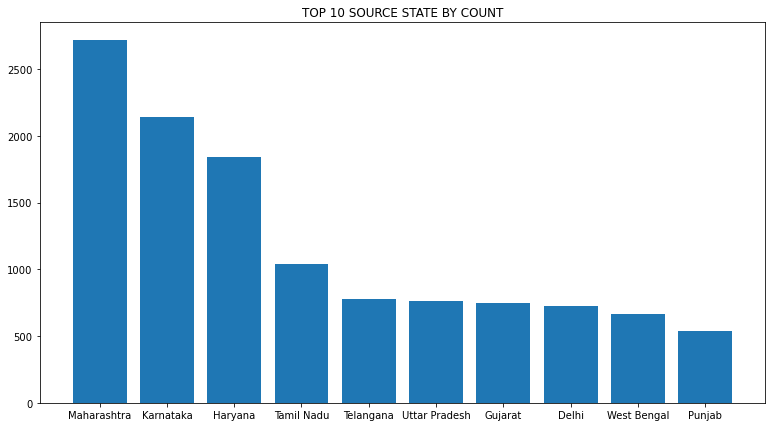

In [87]:
plt.figure(figsize=(13,7))
plt.bar(new_final['source_state'].value_counts()[0:10].index,new_final['source_state'].value_counts()[0:10].values)
plt.title("TOP 10 SOURCE STATE BY COUNT")
plt.show()

#### TOP 10 SOURCE CITY
FINDING TOP CITY FROM WHERE PARCELS ARE TRANSPORTED.

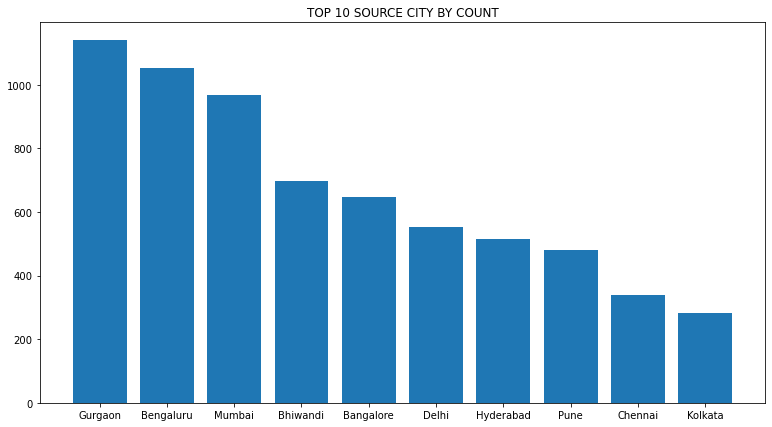

In [88]:
plt.figure(figsize=(13,7))
plt.bar(new_final['source_city'].value_counts()[0:10].index,new_final['source_city'].value_counts()[0:10].values)
plt.title("TOP 10 SOURCE CITY BY COUNT")
plt.show()

#### TOP 10 DESTINATION STATE
FINDING TOP STATE TO WHERE PARCELS ARE SHIPPED.

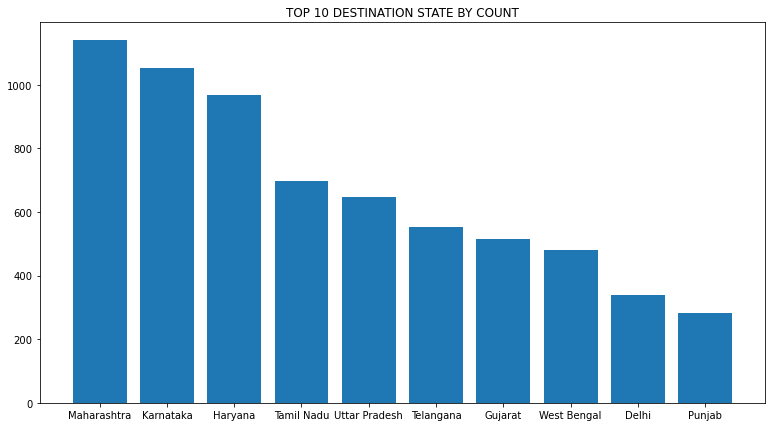

In [89]:
plt.figure(figsize=(13,7))
plt.bar(new_final['destination_state'].value_counts()[0:10].index,new_final['source_city'].value_counts()[0:10].values)
plt.title("TOP 10 DESTINATION STATE BY COUNT")
plt.show()

#### TOP 10 DESTINATION CITY
FINDING TOP CITY TO WHERE PARCELS ARE SHIPPED.

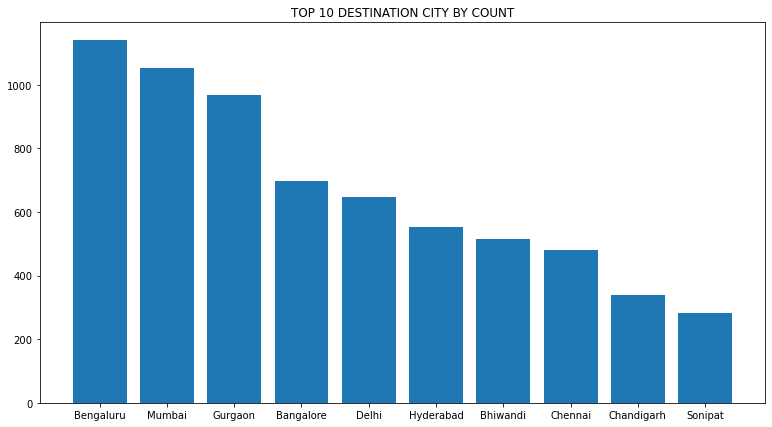

In [90]:
plt.figure(figsize=(13,7))
plt.bar(new_final['destination_city'].value_counts()[0:10].index,new_final['source_city'].value_counts()[0:10].values)
plt.title("TOP 10 DESTINATION CITY BY COUNT")
plt.show()

#### TRIP CREATION MONTH BY COUNT
FINDING ON WHICH MONTH SHIPMENT WAS MORE ACTIVE.

In [91]:
months_count = new_final['trip_creation_month'].value_counts().to_frame().reset_index().rename(columns={'index':'month','trip_creation_month':'counts'})
months_count

,month,counts
0,9,13029
1,10,1788


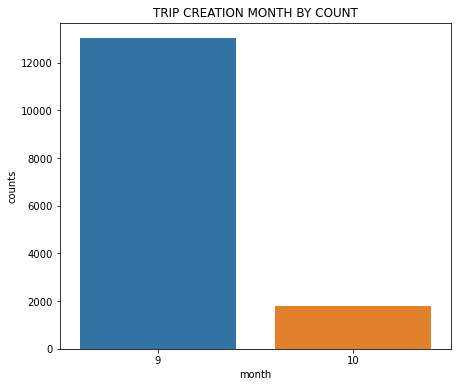

In [92]:
plt.figure(figsize=(7,6))
sns.barplot(data=months_count,x='month',y='counts')
plt.title("TRIP CREATION MONTH BY COUNT")
plt.show()

#### TRIP CREATION DAY BY COUNT
FINDING ON WHICH DAY SHIPMENT WAS MORE ACTIVE.

In [93]:
day_count = new_final['trip_creation_day'].value_counts().to_frame().reset_index()[:10]
day_count

,index,trip_creation_day
0,18,791
1,15,783
2,13,750
3,12,747
4,21,740
5,22,740
6,17,722
7,14,712
8,20,704
9,25,697


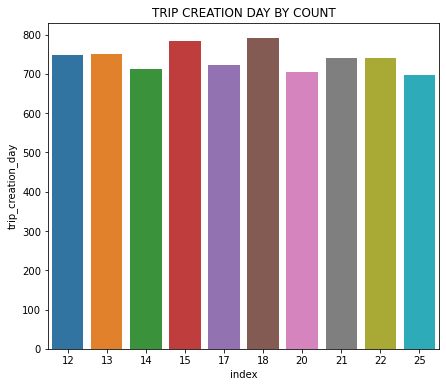

In [94]:
plt.figure(figsize=(7,6))
sns.barplot(data=day_count,x='index',y='trip_creation_day')
plt.title("TRIP CREATION DAY BY COUNT")
plt.show()

#### TOP 10 DESTINATION WEEK BY COUNT
FINDING ON WHICH WEEKDAY SHIPMENT WAS MORE ACTIVE.

In [95]:
new_final['trip_creation_week'].value_counts().to_frame()

,trip_creation_week
2,2739
5,2130
3,2106
4,2060
1,2040
0,1987
6,1755


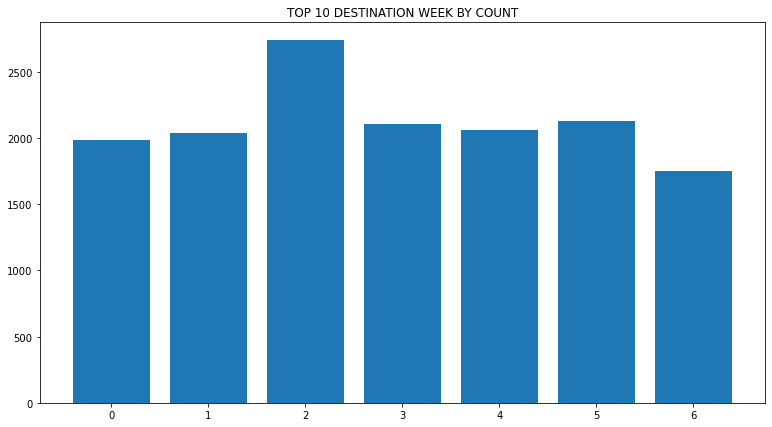

In [96]:
# mapping = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday',5:'Saturday', 6:'Sunday'}

plt.figure(figsize=(13,7))
plt.bar(new_final['trip_creation_week'].value_counts().index,new_final['trip_creation_week'].value_counts().values)
plt.title("TOP 10 DESTINATION WEEK BY COUNT")
plt.show()

### BIVARIATE ANALYSIS

In [97]:
new_final.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_diff_time_minutes,actual_distance_to_destination,segment_osrm_distance_sum,osrm_distance,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,trip_creation_year,trip_creation_month,trip_creation_week,trip_creation_day,trip_creation_week_name,source_state,destination_state,source_city,destination_city,source_code,destination_code
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),280.0,280.765626,48.474072,70.1544,65.6188,149.0,147.0,60.0,65.0,2018,9,2,12,Wednesday,Uttar Pradesh,Uttar Pradesh,Kanpur,Kanpur,6,6
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,84.1894,85.1110,143.0,141.0,68.0,65.0,2018,9,2,12,Wednesday,Karnataka,Karnataka,Doddablpur,Doddablpur,D,D
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),280.0,280.765626,48.474072,70.1544,65.6188,149.0,147.0,60.0,65.0,2018,9,2,12,Wednesday,Haryana,Haryana,Gurgaon,Gurgaon,HB,HB
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,19.8766,19.6800,59.0,59.0,15.0,16.0,2018,9,2,12,Wednesday,Maharashtra,Maharashtra,Mumbai,Mumbai,Mumbai Hub,IP
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,146.7919,146.7918,341.0,340.0,117.0,115.0,2018,9,2,12,Wednesday,Karnataka,Karnataka,Bellary,Sandur,Dc,D


#### COMPARING MEAN VALUE OF START_SCAN_TO_END_SCAN AND OD_DIFF_TIME FOR TOP 10 SOURCE STATE

In [98]:
new_final.groupby('source_state').mean().sort_values('od_diff_time_minutes',ascending=False).reset_index()

,source_state,start_scan_to_end_scan,od_diff_time_minutes,actual_distance_to_destination,segment_osrm_distance_sum,osrm_distance,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,trip_creation_year,trip_creation_month,trip_creation_week,trip_creation_day
0,Himachal Pradesh,930.941176,932.050083,115.911595,195.480115,195.440394,254.441176,252.529412,199.411765,204.823529,2018.0,9.088235,3.088235,19.088235
1,Nagaland,825.600000,826.324622,57.950662,172.487720,103.497700,267.200000,265.000000,74.600000,118.800000,2018.0,9.000000,3.800000,23.600000
2,Goa,785.784615,786.870255,218.947471,147.480248,141.720895,420.907692,417.553846,98.400000,174.984615,2018.0,9.000000,3.046154,19.184615
3,Uttarakhand,781.210526,782.382232,104.206534,144.099276,145.873886,294.070175,292.692982,156.307018,161.921053,2018.0,9.157895,3.096491,18.061404
4,Bihar,625.462857,630.005187,132.399341,176.129992,166.039096,301.697143,299.914286,124.622857,133.025714,2018.0,9.120000,2.937143,18.117143
5,Pondicherry,601.916667,604.698426,233.616287,267.304950,266.931242,462.416667,459.750000,217.833333,214.916667,2018.0,9.000000,2.583333,19.583333
6,Andhra Pradesh,520.986175,522.482727,134.448073,173.566778,170.111627,316.506912,316.327189,138.755760,144.290323,2018.0,9.126728,2.963134,18.274194
7,Arunachal Pradesh,508.500000,509.130113,76.500104,119.871675,100.083325,242.500000,239.500000,77.250000,88.750000,2018.0,9.000000,1.500000,18.500000
8,Kerala,486.650519,487.889488,97.776494,99.004349,97.520746,206.017301,203.844291,95.155709,100.640138,2018.0,9.121107,2.878893,18.788927
9,Madhya Pradesh,485.646688,486.635031,113.535463,157.986993,142.837764,290.179811,285.820189,119.198738,130.337539,2018.0,9.157729,2.899054,18.192429


In [99]:
diff_time_state =  new_final.groupby('source_state').mean().sort_values('od_diff_time_minutes',ascending=False).reset_index()[['source_state','start_scan_to_end_scan','od_diff_time_minutes']][:10]
diff_time_state.set_index('source_state',inplace=True)
diff_time_state

,start_scan_to_end_scan,od_diff_time_minutes
source_state,,
Himachal Pradesh,930.941176,932.050083
Nagaland,825.600000,826.324622
Goa,785.784615,786.870255
Uttarakhand,781.210526,782.382232
Bihar,625.462857,630.005187
Pondicherry,601.916667,604.698426
Andhra Pradesh,520.986175,522.482727
Arunachal Pradesh,508.500000,509.130113
Kerala,486.650519,487.889488


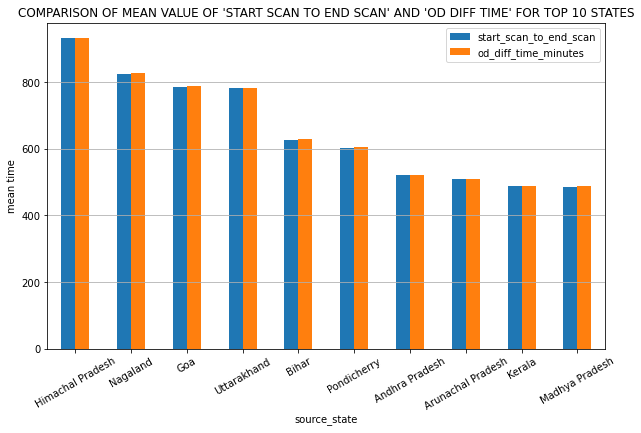

In [100]:
ax = diff_time_state.plot(kind='bar',figsize=(10,6))
plt.title("COMPARISON OF MEAN VALUE OF 'START SCAN TO END SCAN' AND 'OD DIFF TIME' FOR TOP 10 STATES")
plt.ylabel('mean time')
plt.grid(axis='y')
ax.set_xticklabels(diff_time_state.index, rotation=30)
plt.show()

#### COMPARING MEAN DISTANCE BETWEEN ACTUAL DISTANCE AND SEGMENT OSRM DISTANCE

In [101]:
actual_osrm_distance =  new_final.groupby('source_state').mean().sort_values('segment_osrm_distance_sum',ascending=False).reset_index()[['source_state','actual_distance_to_destination','segment_osrm_distance_sum']][:10]
actual_osrm_distance.set_index('source_state',inplace=True)

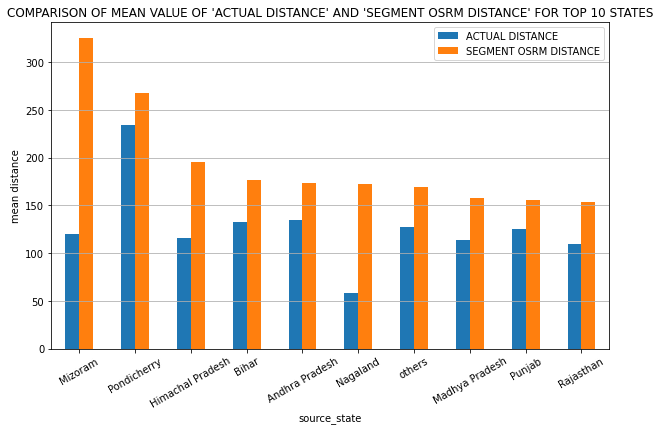

In [102]:
ax = actual_osrm_distance.plot(kind='bar',figsize=(10,6))
plt.title("COMPARISON OF MEAN VALUE OF 'ACTUAL DISTANCE' AND 'SEGMENT OSRM DISTANCE' FOR TOP 10 STATES")
plt.ylabel('mean distance')
plt.legend(['ACTUAL DISTANCE','SEGMENT OSRM DISTANCE'])
plt.grid(axis='y')
ax.set_xticklabels(actual_osrm_distance.index, rotation=30)
plt.show()

#### COMPARING MEAN DISTANCE BETWEEN AGGREGATED OSRM TIME AND AGGREGATED SEGMENT OSRM TIME

In [103]:
actual_osrm_time =  new_final.groupby('source_state').mean().sort_values('segment_osrm_time_sum',ascending=False).reset_index()[['source_state','osrm_time','segment_osrm_time_sum']][:10]
actual_osrm_time.set_index('source_state',inplace=True)

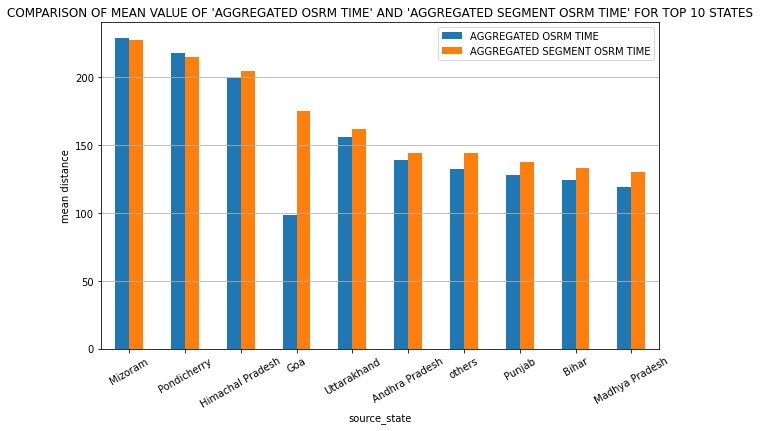

In [104]:
ax = actual_osrm_time.plot(kind='bar',figsize=(10,6))
plt.title("COMPARISON OF MEAN VALUE OF 'AGGREGATED OSRM TIME' AND 'AGGREGATED SEGMENT OSRM TIME' FOR TOP 10 STATES")
plt.ylabel('mean distance')
plt.legend(['AGGREGATED OSRM TIME','AGGREGATED SEGMENT OSRM TIME'])
plt.grid(axis='y')
ax.set_xticklabels(actual_osrm_time.index, rotation=30)
plt.show()

#### COMPARING MEAN VALUE OF ACTUAL TIME AND AGGREGATE SEGMENT ACTUAL TIME

In [105]:
actual_segment_time =  new_final.groupby('source_state').mean().sort_values('segment_osrm_time_sum',ascending=False).reset_index()[['source_state','actual_time','segment_actual_time_sum']][:10]
actual_segment_time.set_index('source_state',inplace=True)

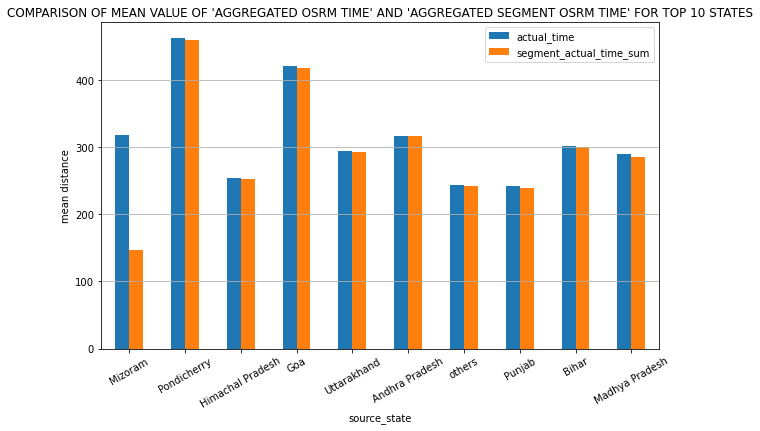

In [106]:
ax = actual_segment_time.plot(kind='bar',figsize=(10,6))
plt.title("COMPARISON OF MEAN VALUE OF 'AGGREGATED OSRM TIME' AND 'AGGREGATED SEGMENT OSRM TIME' FOR TOP 10 STATES")
plt.ylabel('mean distance')
plt.grid(axis='y')
ax.set_xticklabels(actual_segment_time.index, rotation=30)
plt.show()

### INSIGHTS

- TOP THREE STATES FROM WHERE ORDERS ARE COMING ARE MAHARASTRA, KARNATAKA AND HARYANA.
- TOP THREE CITY FROM WHERE ORDERS ARE COMING ARE GURGAON, BENGALURU AND MUMBAI.


- TOP THREE STATES TO WHERE ORDERS ARE BEING DELIVERED ARE **MAHARASTRA, KARNATAKA AND HARYANA**.
- TOP THREE CITY TO WHERE ORDERS ARE BEING DELIVERED ARE **BENGALURU, MUMBAI AND GURGAON**.


- MONTH 9 HAS THE MAXIMUM ORDER GENERATOR MONTH WITH MORE THAN 13029 UNIQUE ORDER SHIPMENT WHILE MONTH 10 HAS ONLY 1788 ORDERS.
- TOP THREE DAY WHERE MOST ORDERS ARE PLACED ARE ON 18th, 15th AND 13th WITH 791,783 AND 750 UNIQUE SHIPMENT RESPECTIVELY.
- MOST OF THE SHIPMENT MADE IS ON **WEDNESDAY**(2) THAT IS 2739.


- THE MEAN DISTANCE BETWEEN ACTUAL DISTANCE TO DESTINATION AND SEGMENT OSRM DISTANCE IS DIFFERENT.

### RECOMENDATIONS

- THE DISTANCE PROVIDED BY OSRM ALGORITHM IS MORE THAN THAT OF ACTUAL DISTANCE, TEAM SHOULD LOOK INTO THIS.
- THE ACTUAL TIME AND THE OSRM TIME IS DIFFERENT, THE OSRM ALGORITHM's TIME IS MUCH LESS. TEAM SHOULD LOOK INTO THIS. 